<h2><img src="./coding hive logo med with text.png" height="60" width ="47">  Coding A Neural Network 1: Image Classification</h2>

<h3>Step 1: Load the Libraries</h3>

In [13]:
import keras                               # deep learning package, less parameter and visually user friendly to minimize complexity
from keras.datasets import mnist           # dataset we will use to train our model
from keras.layers import Dense             # Dense describes how the layers are connected
from keras.models import Sequential        # Sequential means we are creating a sequence of connectec layers
from keras.optimizers import SGD           # Sochastic gradient descent is the method used to find local minimum
import matplotlib.pyplot as plt            # visualize images
from keras.preprocessing import image      # preprocess images
import tensorflow as tf                    # another way to obtain the data if keras link is not working

<h3>Step 2: Obtain Data</h3>

In [14]:
(train_x, train_y) , (test_x, test_y) = mnist.load_data()  #load images into training and test datasets, MNIST is a open data sets for deep learning
#(train_x, train_y) , (test_x, test_y) = tf.keras.datasets.mnist.load_data(path='mnist.npz') #backup method
train_x = train_x.astype('float32') / 255                 #optional (you can rescale the RBG for each pixel), /255 means normalization to increase convergence speed by converting each pixel into the scale b/w 0 and 1
test_x = test_x.astype('float32') / 255                   #optional (you can rescale the RBG for each pixel)
print(train_x.shape)                                       #let us view the dimensions of the train set
print(train_y.shape)                                       #let us view the dimentions of the train label
print(test_x.shape)                                        #view the dimensions of the test set
print(test_y.shape)                                        #view the dimensions of the test label

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [4]:
#look at the type of data stored in one image (there is 6000 of them!)
train_x[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

<h3>Step 3: Reshape Data</h3>

In [15]:
train_x = train_x.reshape(60000,784)                #reduce dimensions from 28x28 to 1x784
test_x = test_x.reshape(10000,784)                  #reduce dimensions from 28x28 to 1x784
train_y = keras.utils.to_categorical(train_y,10)    #convert y label to categorical with 10 possible outputs
test_y = keras.utils.to_categorical(test_y,10)      #convert y label to categorical with 10 possible outputs
print(train_x.shape)                                #view the new shape of training set
print(train_y.shape)                                #view the new shape of training label
print(test_x.shape)                                 #view the new shape of the test set
print(test_y.shape)                                 #view the new shape of the test label

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [16]:
train_x[1] #view the content of one reshaped image. How is it different from before?


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3>Step 4: Define Your Model</h3>

In [17]:
model = Sequential()                                               #explain sequential 
model.add(Dense(units=128,activation="relu",input_shape=(784,)))   #first HIDDEN layer, start at 784 input and here we have 128 nords, shrunk the size by combininng all the input via different ways
model.add(Dense(units=128,activation="relu"))                      #second HIDDEN layer, taking the input from the previous layer with the same size of 128 and find all the possible combinations
model.add(Dense(units=128,activation="relu"))                      #third HIDDEN layer, same
model.add(Dense(units=10,activation="softmax"))                    #output layer, 10 outputs
model.summary()                                                   
#the reason we determine having 128 units in each layer is because we reference to the previous tests which prove the applausible accuracy to have by having this number of units
#coming up with the new relationship/combination which could affect the accuracy of the model
#the param below: 784*128+bias(128 here), pixel1*weight1+...+pixel784*weight784+bias1, ..., pixel1*weight1+...+pixel784*weight784+bias128

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_14 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________


<h3>Step 5: Compile Your Model</h3>

In [18]:
model.compile(optimizer=SGD(0.001),loss="categorical_crossentropy",metrics=["accuracy"])

#what is SGD? == Stochastic Gradient Descent
#what is lr? == learning rate
#what is loss? == loss function
#what is entropy? == how much randomness is in the bucket, for example we have two buckets 0 and 1 and bucket0 has [0,1,1,0,1,1] and bucket1 has [1,1,1,1,1]. In this case, bucket0 has much more randomness and hence more entropy; bucket1 has only 1 thus 0 entropy

<h3>Step 6: Fit Your Model</h3>

In [19]:
history=model.fit(train_x,train_y,batch_size=32,epochs=30,verbose=1)
#train_x: Your training dataset
#train_y: Your training label
#epochs:       one forward pass and one backward pass of all the training examples, here 30 times back&forth (backpropagatioin)
#batch_size:   the number of training examples in one forward/backward pass; based on your computing size like personal laptop and #GPUs available
#verbose: display log on screen

Instructions for updating:
Use tf.cast instead.


Epoch 1/30


   32/60000 [..............................] - ETA: 10:13 - loss: 2.3403 - acc: 0.0625

  416/60000 [..............................] - ETA: 57s - loss: 2.3244 - acc: 0.1058  

  832/60000 [..............................] - ETA: 32s - loss: 2.3276 - acc: 0.1106

  928/60000 [..............................] - ETA: 32s - loss: 2.3259 - acc: 0.1088

 1248/60000 [..............................] - ETA: 26s - loss: 2.3249 - acc: 0.1058

 1344/60000 [..............................] - ETA: 26s - loss: 2.3246 - acc: 0.1049

 1760/60000 [..............................] - ETA: 23s - loss: 2.3222 - acc: 0.1068

 2208/60000 [>.............................] - ETA: 19s - loss: 2.3190 - acc: 0.1101

 2240/60000 [>.............................] - ETA: 20s - loss: 2.3189 - acc: 0.1103

 2560/60000 [>.............................] - ETA: 20s - loss: 2.3178 - acc: 0.1105

 3008/60000 [>.............................] - ETA: 19s - loss: 2.3196 - acc: 0.1090

 3456/60000 [>.............................] - ETA: 17s - loss: 2.3178 - acc: 0.1085

 3520/60000 [>.............................] - ETA: 17s - loss: 2.3181 - acc: 0.1077

 4000/60000 [=>............................] - ETA: 16s - loss: 2.3167 - acc: 0.1080

 4448/60000 [=>............................] - ETA: 15s - loss: 2.3146 - acc: 0.1081

 4512/60000 [=>............................] - ETA: 16s - loss: 2.3143 - acc: 0.1084

 4960/60000 [=>............................] - ETA: 15s - loss: 2.3102 - acc: 0.1125

 5024/60000 [=>............................] - ETA: 15s - loss: 2.3098 - acc: 0.1135

 5248/60000 [=>............................] - ETA: 15s - loss: 2.3096 - acc: 0.1124

 5376/60000 [=>............................] - ETA: 16s - loss: 2.3093 - acc: 0.1120

 5632/60000 [=>............................] - ETA: 16s - loss: 2.3076 - acc: 0.1122

 6016/60000 [==>...........................] - ETA: 15s - loss: 2.3061 - acc: 0.1152

 6048/60000 [==>...........................] - ETA: 16s - loss: 2.3058 - acc: 0.1151

 6240/60000 [==>...........................] - ETA: 16s - loss: 2.3043 - acc: 0.1176

 6656/60000 [==>...........................] - ETA: 15s - loss: 2.3022 - acc: 0.1194

 6720/60000 [==>...........................] - ETA: 15s - loss: 2.3020 - acc: 0.1195

 7072/60000 [==>...........................] - ETA: 15s - loss: 2.3009 - acc: 0.1198

 7520/60000 [==>...........................] - ETA: 15s - loss: 2.2988 - acc: 0.1207

 7584/60000 [==>...........................] - ETA: 15s - loss: 2.2986 - acc: 0.1212

 7872/60000 [==>...........................] - ETA: 15s - loss: 2.2972 - acc: 0.1228

 8352/60000 [===>..........................] - ETA: 14s - loss: 2.2951 - acc: 0.1260

 8800/60000 [===>..........................] - ETA: 14s - loss: 2.2927 - acc: 0.1282

 8832/60000 [===>..........................] - ETA: 14s - loss: 2.2925 - acc: 0.1284

 9216/60000 [===>..........................] - ETA: 14s - loss: 2.2909 - acc: 0.1310

 9696/60000 [===>..........................] - ETA: 13s - loss: 2.2886 - acc: 0.1339

 9760/60000 [===>..........................] - ETA: 13s - loss: 2.2883 - acc: 0.1342

10144/60000 [====>.........................] - ETA: 13s - loss: 2.2870 - acc: 0.1367

10528/60000 [====>.........................] - ETA: 13s - loss: 2.2850 - acc: 0.1395

10848/60000 [====>.........................] - ETA: 13s - loss: 2.2837 - acc: 0.1419

10976/60000 [====>.........................] - ETA: 13s - loss: 2.2833 - acc: 0.1422

11360/60000 [====>.........................] - ETA: 13s - loss: 2.2813 - acc: 0.1441

11424/60000 [====>.........................] - ETA: 13s - loss: 2.2813 - acc: 0.1443

11872/60000 [====>.........................] - ETA: 13s - loss: 2.2786 - acc: 0.1482

12320/60000 [=====>........................] - ETA: 12s - loss: 2.2768 - acc: 0.1512

12384/60000 [=====>........................] - ETA: 12s - loss: 2.2764 - acc: 0.1521

12832/60000 [=====>........................] - ETA: 12s - loss: 2.2741 - acc: 0.1559

13216/60000 [=====>........................] - ETA: 12s - loss: 2.2727 - acc: 0.1579

13344/60000 [=====>........................] - ETA: 12s - loss: 2.2721 - acc: 0.1591

13760/60000 [=====>........................] - ETA: 11s - loss: 2.2698 - acc: 0.1636

13856/60000 [=====>........................] - ETA: 12s - loss: 2.2693 - acc: 0.1644

14272/60000 [======>.......................] - ETA: 11s - loss: 2.2676 - acc: 0.1677

14656/60000 [======>.......................] - ETA: 11s - loss: 2.2659 - acc: 0.1717

14752/60000 [======>.......................] - ETA: 11s - loss: 2.2654 - acc: 0.1725

15200/60000 [======>.......................] - ETA: 11s - loss: 2.2633 - acc: 0.1757

15232/60000 [======>.......................] - ETA: 11s - loss: 2.2632 - acc: 0.1757

15616/60000 [======>.......................] - ETA: 11s - loss: 2.2612 - acc: 0.1789

15904/60000 [======>.......................] - ETA: 11s - loss: 2.2596 - acc: 0.1817

16128/60000 [=======>......................] - ETA: 11s - loss: 2.2586 - acc: 0.1831

16512/60000 [=======>......................] - ETA: 11s - loss: 2.2574 - acc: 0.1857

16928/60000 [=======>......................] - ETA: 10s - loss: 2.2555 - acc: 0.1886

17024/60000 [=======>......................] - ETA: 10s - loss: 2.2550 - acc: 0.1893

17376/60000 [=======>......................] - ETA: 10s - loss: 2.2533 - acc: 0.1925

17504/60000 [=======>......................] - ETA: 10s - loss: 2.2528 - acc: 0.1934

17984/60000 [=======>......................] - ETA: 10s - loss: 2.2502 - acc: 0.1982

18048/60000 [========>.....................] - ETA: 10s - loss: 2.2500 - acc: 0.1984

44896/60000 [=====================>........] - ETA: 2s - loss: 0.1980 - acc: 0.9430

45344/60000 [=====================>........] - ETA: 2s - loss: 0.1985 - acc: 0.9429

45440/60000 [=====================>........] - ETA: 2s - loss: 0.1984 - acc: 0.9429

45856/60000 [=====================>........] - ETA: 2s - loss: 0.1985 - acc: 0.9429

46272/60000 [======================>.......] - ETA: 2s - loss: 0.1988 - acc: 0.9428

46400/60000 [======================>.......] - ETA: 2s - loss: 0.1987 - acc: 0.9428

46816/60000 [======================>.......] - ETA: 2s - loss: 0.1984 - acc: 0.9429

46944/60000 [======================>.......] - ETA: 2s - loss: 0.1985 - acc: 0.9428

47424/60000 [======================>.......] - ETA: 2s - loss: 0.1984 - acc: 0.9429

47872/60000 [======================>.......] - ETA: 2s - loss: 0.1981 - acc: 0.9430

47936/60000 [======================>.......] - ETA: 2s - loss: 0.1981 - acc: 0.9429

48288/60000 [=======================>......] - ETA: 2s - loss: 0.1980 - acc: 0.9430

48448/60000 [=======================>......] - ETA: 2s - loss: 0.1981 - acc: 0.9429

48736/60000 [=======================>......] - ETA: 2s - loss: 0.1983 - acc: 0.9428

49024/60000 [=======================>......] - ETA: 2s - loss: 0.1983 - acc: 0.9428

49440/60000 [=======================>......] - ETA: 2s - loss: 0.1984 - acc: 0.9427

49728/60000 [=======================>......] - ETA: 2s - loss: 0.1982 - acc: 0.9427

49952/60000 [=======================>......] - ETA: 1s - loss: 0.1982 - acc: 0.9427

50336/60000 [========================>.....] - ETA: 1s - loss: 0.1985 - acc: 0.9427

50464/60000 [========================>.....] - ETA: 1s - loss: 0.1983 - acc: 0.9427

50784/60000 [========================>.....] - ETA: 1s - loss: 0.1979 - acc: 0.9428

50976/60000 [========================>.....] - ETA: 1s - loss: 0.1977 - acc: 0.9429

51232/60000 [========================>.....] - ETA: 1s - loss: 0.1977 - acc: 0.9429

51456/60000 [========================>.....] - ETA: 1s - loss: 0.1978 - acc: 0.9428

51840/60000 [========================>.....] - ETA: 1s - loss: 0.1975 - acc: 0.9428

51968/60000 [========================>.....] - ETA: 1s - loss: 0.1974 - acc: 0.9429

52320/60000 [=========================>....] - ETA: 1s - loss: 0.1975 - acc: 0.9428

52544/60000 [=========================>....] - ETA: 1s - loss: 0.1976 - acc: 0.9428

52896/60000 [=========================>....] - ETA: 1s - loss: 0.1974 - acc: 0.9429

53248/60000 [=========================>....] - ETA: 1s - loss: 0.1971 - acc: 0.9430

53408/60000 [=========================>....] - ETA: 1s - loss: 0.1973 - acc: 0.9429

53824/60000 [=========================>....] - ETA: 1s - loss: 0.1974 - acc: 0.9429

53952/60000 [=========================>....] - ETA: 1s - loss: 0.1973 - acc: 0.9429

54368/60000 [==========================>...] - ETA: 1s - loss: 0.1970 - acc: 0.9431

54464/60000 [==========================>...] - ETA: 1s - loss: 0.1970 - acc: 0.9431

54880/60000 [==========================>...] - ETA: 1s - loss: 0.1968 - acc: 0.9432

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1966 - acc: 0.9433

55424/60000 [==========================>...] - ETA: 0s - loss: 0.1965 - acc: 0.9433

55872/60000 [==========================>...] - ETA: 0s - loss: 0.1967 - acc: 0.9432

56000/60000 [===========================>..] - ETA: 0s - loss: 0.1970 - acc: 0.9431

56448/60000 [===========================>..] - ETA: 0s - loss: 0.1971 - acc: 0.9431

56544/60000 [===========================>..] - ETA: 0s - loss: 0.1972 - acc: 0.9431

57024/60000 [===========================>..] - ETA: 0s - loss: 0.1969 - acc: 0.9431

57472/60000 [===========================>..] - ETA: 0s - loss: 0.1967 - acc: 0.9431

57568/60000 [===========================>..] - ETA: 0s - loss: 0.1966 - acc: 0.9431

57984/60000 [===========================>..] - ETA: 0s - loss: 0.1967 - acc: 0.9431

58112/60000 [============================>.] - ETA: 0s - loss: 0.1966 - acc: 0.9431

58528/60000 [============================>.] - ETA: 0s - loss: 0.1966 - acc: 0.9432

58656/60000 [============================>.] - ETA: 0s - loss: 0.1965 - acc: 0.9432

59072/60000 [============================>.] - ETA: 0s - loss: 0.1962 - acc: 0.9433

59520/60000 [============================>.] - ETA: 0s - loss: 0.1963 - acc: 0.9433

59648/60000 [============================>.] - ETA: 0s - loss: 0.1963 - acc: 0.9432

59968/60000 [============================>.] - ETA: 0s - loss: 0.1959 - acc: 0.9434

60000/60000 [==============================] - 12s 197us/step - loss: 0.1959 - acc: 0.9434


Epoch 28/30
   32/60000 [..............................] - ETA: 59s - loss: 0.1765 - acc: 0.9375

  352/60000 [..............................] - ETA: 14s - loss: 0.2147 - acc: 0.9403

  544/60000 [..............................] - ETA: 14s - loss: 0.2022 - acc: 0.9467

  960/60000 [..............................] - ETA: 11s - loss: 0.1876 - acc: 0.9458

 1088/60000 [..............................] - ETA: 12s - loss: 0.1904 - acc: 0.9458

 1312/60000 [..............................] - ETA: 12s - loss: 0.1793 - acc: 0.9489

 1568/60000 [..............................] - ETA: 12s - loss: 0.1774 - acc: 0.9483

 2080/60000 [>.............................] - ETA: 12s - loss: 0.1780 - acc: 0.9457

 2560/60000 [>.............................] - ETA: 10s - loss: 0.1786 - acc: 0.9469

 2656/60000 [>.............................] - ETA: 11s - loss: 0.1802 - acc: 0.9465

 3136/60000 [>.............................] - ETA: 10s - loss: 0.1844 - acc: 0.9458

 3232/60000 [>.............................] - ETA: 11s - loss: 0.1849 - acc: 0.9452

 3680/60000 [>.............................] - ETA: 11s - loss: 0.1860 - acc: 0.9457

 4064/60000 [=>............................] - ETA: 10s - loss: 0.1866 - acc: 0.9459

 4192/60000 [=>............................] - ETA: 11s - loss: 0.1894 - acc: 0.9456

 4640/60000 [=>............................] - ETA: 10s - loss: 0.1871 - acc: 0.9470

 4736/60000 [=>............................] - ETA: 10s - loss: 0.1865 - acc: 0.9470

 5216/60000 [=>............................] - ETA: 10s - loss: 0.1878 - acc: 0.9471

 5664/60000 [=>............................] - ETA: 10s - loss: 0.1862 - acc: 0.9476

 5792/60000 [=>............................] - ETA: 10s - loss: 0.1846 - acc: 0.9479

 6240/60000 [==>...........................] - ETA: 10s - loss: 0.1862 - acc: 0.9465

 6336/60000 [==>...........................] - ETA: 10s - loss: 0.1855 - acc: 0.9465

 6784/60000 [==>...........................] - ETA: 10s - loss: 0.1855 - acc: 0.9466

 7264/60000 [==>...........................] - ETA: 10s - loss: 0.1874 - acc: 0.9470

 7360/60000 [==>...........................] - ETA: 10s - loss: 0.1880 - acc: 0.9470

 7808/60000 [==>...........................] - ETA: 9s - loss: 0.1907 - acc: 0.9470 

 7936/60000 [==>...........................] - ETA: 10s - loss: 0.1898 - acc: 0.9473

 8384/60000 [===>..........................] - ETA: 9s - loss: 0.1904 - acc: 0.9472 

 8480/60000 [===>..........................] - ETA: 9s - loss: 0.1900 - acc: 0.9474

 8928/60000 [===>..........................] - ETA: 9s - loss: 0.1881 - acc: 0.9475

 9056/60000 [===>..........................] - ETA: 9s - loss: 0.1888 - acc: 0.9469

 9440/60000 [===>..........................] - ETA: 9s - loss: 0.1904 - acc: 0.9461

 9568/60000 [===>..........................] - ETA: 9s - loss: 0.1904 - acc: 0.9463

 9952/60000 [===>..........................] - ETA: 9s - loss: 0.1938 - acc: 0.9450

10368/60000 [====>.........................] - ETA: 9s - loss: 0.1935 - acc: 0.9452

10496/60000 [====>.........................] - ETA: 9s - loss: 0.1946 - acc: 0.9448

10944/60000 [====>.........................] - ETA: 9s - loss: 0.1950 - acc: 0.9440

11040/60000 [====>.........................] - ETA: 9s - loss: 0.1948 - acc: 0.9441

11488/60000 [====>.........................] - ETA: 9s - loss: 0.1943 - acc: 0.9439

11840/60000 [====>.........................] - ETA: 9s - loss: 0.1938 - acc: 0.9440

12032/60000 [=====>........................] - ETA: 9s - loss: 0.1935 - acc: 0.9440

12480/60000 [=====>........................] - ETA: 9s - loss: 0.1931 - acc: 0.9446

12576/60000 [=====>........................] - ETA: 9s - loss: 0.1930 - acc: 0.9447

13056/60000 [=====>........................] - ETA: 9s - loss: 0.1929 - acc: 0.9445

13472/60000 [=====>........................] - ETA: 8s - loss: 0.1929 - acc: 0.9443

13600/60000 [=====>........................] - ETA: 8s - loss: 0.1923 - acc: 0.9445

14016/60000 [======>.......................] - ETA: 8s - loss: 0.1910 - acc: 0.9447

14144/60000 [======>.......................] - ETA: 8s - loss: 0.1908 - acc: 0.9448

14528/60000 [======>.......................] - ETA: 8s - loss: 0.1904 - acc: 0.9451

14656/60000 [======>.......................] - ETA: 8s - loss: 0.1907 - acc: 0.9448

15072/60000 [======>.......................] - ETA: 8s - loss: 0.1929 - acc: 0.9439

15520/60000 [======>.......................] - ETA: 8s - loss: 0.1922 - acc: 0.9439

15616/60000 [======>.......................] - ETA: 8s - loss: 0.1921 - acc: 0.9440

16064/60000 [=======>......................] - ETA: 8s - loss: 0.1938 - acc: 0.9439

16192/60000 [=======>......................] - ETA: 8s - loss: 0.1948 - acc: 0.9437

16640/60000 [=======>......................] - ETA: 8s - loss: 0.1946 - acc: 0.9436

16736/60000 [=======>......................] - ETA: 8s - loss: 0.1944 - acc: 0.9438

17184/60000 [=======>......................] - ETA: 8s - loss: 0.1951 - acc: 0.9438

17632/60000 [=======>......................] - ETA: 8s - loss: 0.1958 - acc: 0.9434

17728/60000 [=======>......................] - ETA: 8s - loss: 0.1963 - acc: 0.9433

18176/60000 [========>.....................] - ETA: 8s - loss: 0.1983 - acc: 0.9431

18304/60000 [========>.....................] - ETA: 8s - loss: 0.1976 - acc: 0.9432

18784/60000 [========>.....................] - ETA: 7s - loss: 0.1971 - acc: 0.9431

18880/60000 [========>.....................] - ETA: 7s - loss: 0.1971 - acc: 0.9432

19328/60000 [========>.....................] - ETA: 7s - loss: 0.1964 - acc: 0.9433

19456/60000 [========>.....................] - ETA: 7s - loss: 0.1963 - acc: 0.9434

19872/60000 [========>.....................] - ETA: 7s - loss: 0.1951 - acc: 0.9436

20288/60000 [=========>....................] - ETA: 7s - loss: 0.1948 - acc: 0.9438

20384/60000 [=========>....................] - ETA: 7s - loss: 0.1945 - acc: 0.9439

20800/60000 [=========>....................] - ETA: 7s - loss: 0.1936 - acc: 0.9441

20896/60000 [=========>....................] - ETA: 7s - loss: 0.1938 - acc: 0.9440

21344/60000 [=========>....................] - ETA: 7s - loss: 0.1930 - acc: 0.9442

21472/60000 [=========>....................] - ETA: 7s - loss: 0.1932 - acc: 0.9443

21952/60000 [=========>....................] - ETA: 7s - loss: 0.1933 - acc: 0.9443

22368/60000 [==========>...................] - ETA: 7s - loss: 0.1928 - acc: 0.9444

22496/60000 [==========>...................] - ETA: 7s - loss: 0.1938 - acc: 0.9443

23008/60000 [==========>...................] - ETA: 7s - loss: 0.1939 - acc: 0.9443

23104/60000 [==========>...................] - ETA: 7s - loss: 0.1936 - acc: 0.9444

23552/60000 [==========>...................] - ETA: 7s - loss: 0.1939 - acc: 0.9443

24000/60000 [===========>..................] - ETA: 6s - loss: 0.1935 - acc: 0.9441

24096/60000 [===========>..................] - ETA: 6s - loss: 0.1933 - acc: 0.9441

24576/60000 [===========>..................] - ETA: 6s - loss: 0.1938 - acc: 0.9440

24704/60000 [===========>..................] - ETA: 6s - loss: 0.1940 - acc: 0.9440

25088/60000 [===========>..................] - ETA: 6s - loss: 0.1942 - acc: 0.9441

25504/60000 [===========>..................] - ETA: 6s - loss: 0.1942 - acc: 0.9441

25632/60000 [===========>..................] - ETA: 6s - loss: 0.1938 - acc: 0.9442

26080/60000 [============>.................] - ETA: 6s - loss: 0.1941 - acc: 0.9441

26176/60000 [============>.................] - ETA: 6s - loss: 0.1938 - acc: 0.9441

26592/60000 [============>.................] - ETA: 6s - loss: 0.1947 - acc: 0.9441

26688/60000 [============>.................] - ETA: 6s - loss: 0.1947 - acc: 0.9440

27104/60000 [============>.................] - ETA: 6s - loss: 0.1954 - acc: 0.9436

27520/60000 [============>.................] - ETA: 6s - loss: 0.1948 - acc: 0.9439

27648/60000 [============>.................] - ETA: 6s - loss: 0.1946 - acc: 0.9440

28096/60000 [=============>................] - ETA: 6s - loss: 0.1948 - acc: 0.9440

28192/60000 [=============>................] - ETA: 6s - loss: 0.1945 - acc: 0.9441

28480/60000 [=============>................] - ETA: 6s - loss: 0.1942 - acc: 0.9442

28704/60000 [=============>................] - ETA: 6s - loss: 0.1938 - acc: 0.9443

29184/60000 [=============>................] - ETA: 5s - loss: 0.1930 - acc: 0.9445

29280/60000 [=============>................] - ETA: 5s - loss: 0.1928 - acc: 0.9445

29696/60000 [=============>................] - ETA: 5s - loss: 0.1925 - acc: 0.9446

30144/60000 [==============>...............] - ETA: 5s - loss: 0.1928 - acc: 0.9443

30240/60000 [==============>...............] - ETA: 5s - loss: 0.1927 - acc: 0.9444

30560/60000 [==============>...............] - ETA: 5s - loss: 0.1924 - acc: 0.9444

30752/60000 [==============>...............] - ETA: 5s - loss: 0.1920 - acc: 0.9446

31168/60000 [==============>...............] - ETA: 5s - loss: 0.1918 - acc: 0.9447

31296/60000 [==============>...............] - ETA: 5s - loss: 0.1919 - acc: 0.9446

31712/60000 [==============>...............] - ETA: 5s - loss: 0.1923 - acc: 0.9442

32128/60000 [===============>..............] - ETA: 5s - loss: 0.1923 - acc: 0.9441

32256/60000 [===============>..............] - ETA: 5s - loss: 0.1925 - acc: 0.9439

32672/60000 [===============>..............] - ETA: 5s - loss: 0.1925 - acc: 0.9439

32800/60000 [===============>..............] - ETA: 5s - loss: 0.1925 - acc: 0.9439

33248/60000 [===============>..............] - ETA: 5s - loss: 0.1930 - acc: 0.9438

33376/60000 [===============>..............] - ETA: 5s - loss: 0.1927 - acc: 0.9438

33600/60000 [===============>..............] - ETA: 5s - loss: 0.1928 - acc: 0.9439

33888/60000 [===============>..............] - ETA: 5s - loss: 0.1927 - acc: 0.9439

34080/60000 [================>.............] - ETA: 5s - loss: 0.1931 - acc: 0.9439

34336/60000 [================>.............] - ETA: 4s - loss: 0.1929 - acc: 0.9439

34656/60000 [================>.............] - ETA: 4s - loss: 0.1931 - acc: 0.9437

34880/60000 [================>.............] - ETA: 4s - loss: 0.1932 - acc: 0.9437

35136/60000 [================>.............] - ETA: 4s - loss: 0.1933 - acc: 0.9437

35456/60000 [================>.............] - ETA: 4s - loss: 0.1930 - acc: 0.9438

35680/60000 [================>.............] - ETA: 4s - loss: 0.1931 - acc: 0.9439

36032/60000 [=================>............] - ETA: 4s - loss: 0.1932 - acc: 0.9439

36192/60000 [=================>............] - ETA: 4s - loss: 0.1931 - acc: 0.9439

36576/60000 [=================>............] - ETA: 4s - loss: 0.1932 - acc: 0.9440

36768/60000 [=================>............] - ETA: 4s - loss: 0.1933 - acc: 0.9440

37088/60000 [=================>............] - ETA: 4s - loss: 0.1929 - acc: 0.9441

37280/60000 [=================>............] - ETA: 4s - loss: 0.1926 - acc: 0.9441

37664/60000 [=================>............] - ETA: 4s - loss: 0.1929 - acc: 0.9441

37824/60000 [=================>............] - ETA: 4s - loss: 0.1933 - acc: 0.9440

38208/60000 [==================>...........] - ETA: 4s - loss: 0.1934 - acc: 0.9439

38688/60000 [==================>...........] - ETA: 4s - loss: 0.1933 - acc: 0.9440

38752/60000 [==================>...........] - ETA: 4s - loss: 0.1936 - acc: 0.9440

39232/60000 [==================>...........] - ETA: 4s - loss: 0.1935 - acc: 0.9439

39328/60000 [==================>...........] - ETA: 4s - loss: 0.1935 - acc: 0.9440

39744/60000 [==================>...........] - ETA: 3s - loss: 0.1939 - acc: 0.9438

39840/60000 [==================>...........] - ETA: 3s - loss: 0.1939 - acc: 0.9438

40288/60000 [===================>..........] - ETA: 3s - loss: 0.1938 - acc: 0.9438

40640/60000 [===================>..........] - ETA: 3s - loss: 0.1935 - acc: 0.9439

40800/60000 [===================>..........] - ETA: 3s - loss: 0.1938 - acc: 0.9439

41248/60000 [===================>..........] - ETA: 3s - loss: 0.1935 - acc: 0.9440

41376/60000 [===================>..........] - ETA: 3s - loss: 0.1934 - acc: 0.9440

41760/60000 [===================>..........] - ETA: 3s - loss: 0.1934 - acc: 0.9439

41856/60000 [===================>..........] - ETA: 3s - loss: 0.1934 - acc: 0.9439

42304/60000 [====================>.........] - ETA: 3s - loss: 0.1931 - acc: 0.9440

42752/60000 [====================>.........] - ETA: 3s - loss: 0.1929 - acc: 0.9440

42848/60000 [====================>.........] - ETA: 3s - loss: 0.1929 - acc: 0.9440

43296/60000 [====================>.........] - ETA: 3s - loss: 0.1928 - acc: 0.9440

43360/60000 [====================>.........] - ETA: 3s - loss: 0.1927 - acc: 0.9440

43776/60000 [====================>.........] - ETA: 3s - loss: 0.1927 - acc: 0.9440

43904/60000 [====================>.........] - ETA: 3s - loss: 0.1927 - acc: 0.9440

44352/60000 [=====================>........] - ETA: 3s - loss: 0.1924 - acc: 0.9441

44448/60000 [=====================>........] - ETA: 3s - loss: 0.1923 - acc: 0.9442

44864/60000 [=====================>........] - ETA: 2s - loss: 0.1925 - acc: 0.9440

44992/60000 [=====================>........] - ETA: 2s - loss: 0.1923 - acc: 0.9441

45376/60000 [=====================>........] - ETA: 2s - loss: 0.1927 - acc: 0.9441

45792/60000 [=====================>........] - ETA: 2s - loss: 0.1927 - acc: 0.9442

45952/60000 [=====================>........] - ETA: 2s - loss: 0.1926 - acc: 0.9443

46368/60000 [======================>.......] - ETA: 2s - loss: 0.1927 - acc: 0.9443

46528/60000 [======================>.......] - ETA: 2s - loss: 0.1926 - acc: 0.9443

46976/60000 [======================>.......] - ETA: 2s - loss: 0.1928 - acc: 0.9444

47072/60000 [======================>.......] - ETA: 2s - loss: 0.1930 - acc: 0.9443

47520/60000 [======================>.......] - ETA: 2s - loss: 0.1930 - acc: 0.9443

47648/60000 [======================>.......] - ETA: 2s - loss: 0.1931 - acc: 0.9443

48096/60000 [=======================>......] - ETA: 2s - loss: 0.1928 - acc: 0.9443

48512/60000 [=======================>......] - ETA: 2s - loss: 0.1927 - acc: 0.9443

48608/60000 [=======================>......] - ETA: 2s - loss: 0.1926 - acc: 0.9444

49056/60000 [=======================>......] - ETA: 2s - loss: 0.1925 - acc: 0.9444

49184/60000 [=======================>......] - ETA: 2s - loss: 0.1924 - acc: 0.9445

49568/60000 [=======================>......] - ETA: 2s - loss: 0.1923 - acc: 0.9446

49728/60000 [=======================>......] - ETA: 1s - loss: 0.1921 - acc: 0.9446

49952/60000 [=======================>......] - ETA: 1s - loss: 0.1922 - acc: 0.9445

50208/60000 [========================>.....] - ETA: 1s - loss: 0.1923 - acc: 0.9445

50560/60000 [========================>.....] - ETA: 1s - loss: 0.1922 - acc: 0.9445

50848/60000 [========================>.....] - ETA: 1s - loss: 0.1922 - acc: 0.9445

51168/60000 [========================>.....] - ETA: 1s - loss: 0.1925 - acc: 0.9444

51488/60000 [========================>.....] - ETA: 1s - loss: 0.1925 - acc: 0.9444

51712/60000 [========================>.....] - ETA: 1s - loss: 0.1924 - acc: 0.9444

51968/60000 [========================>.....] - ETA: 1s - loss: 0.1923 - acc: 0.9445

52192/60000 [=========================>....] - ETA: 1s - loss: 0.1924 - acc: 0.9445

52352/60000 [=========================>....] - ETA: 1s - loss: 0.1924 - acc: 0.9445

52576/60000 [=========================>....] - ETA: 1s - loss: 0.1927 - acc: 0.9445

52896/60000 [=========================>....] - ETA: 1s - loss: 0.1923 - acc: 0.9446

53152/60000 [=========================>....] - ETA: 1s - loss: 0.1922 - acc: 0.9446

53472/60000 [=========================>....] - ETA: 1s - loss: 0.1918 - acc: 0.9447

53728/60000 [=========================>....] - ETA: 1s - loss: 0.1919 - acc: 0.9447

54112/60000 [==========================>...] - ETA: 1s - loss: 0.1917 - acc: 0.9448

54400/60000 [==========================>...] - ETA: 1s - loss: 0.1915 - acc: 0.9449

54624/60000 [==========================>...] - ETA: 1s - loss: 0.1916 - acc: 0.9448

54976/60000 [==========================>...] - ETA: 0s - loss: 0.1918 - acc: 0.9446

55136/60000 [==========================>...] - ETA: 0s - loss: 0.1920 - acc: 0.9446

55520/60000 [==========================>...] - ETA: 0s - loss: 0.1921 - acc: 0.9446

55744/60000 [==========================>...] - ETA: 0s - loss: 0.1920 - acc: 0.9446

56160/60000 [===========================>..] - ETA: 0s - loss: 0.1921 - acc: 0.9445

56544/60000 [===========================>..] - ETA: 0s - loss: 0.1917 - acc: 0.9447

56672/60000 [===========================>..] - ETA: 0s - loss: 0.1915 - acc: 0.9448

57152/60000 [===========================>..] - ETA: 0s - loss: 0.1916 - acc: 0.9448

57248/60000 [===========================>..] - ETA: 0s - loss: 0.1917 - acc: 0.9448

57696/60000 [===========================>..] - ETA: 0s - loss: 0.1917 - acc: 0.9448

57824/60000 [===========================>..] - ETA: 0s - loss: 0.1917 - acc: 0.9449

58240/60000 [============================>.] - ETA: 0s - loss: 0.1918 - acc: 0.9448

58720/60000 [============================>.] - ETA: 0s - loss: 0.1916 - acc: 0.9448

58784/60000 [============================>.] - ETA: 0s - loss: 0.1918 - acc: 0.9448

59232/60000 [============================>.] - ETA: 0s - loss: 0.1918 - acc: 0.9449

59360/60000 [============================>.] - ETA: 0s - loss: 0.1917 - acc: 0.9449

59776/60000 [============================>.] - ETA: 0s - loss: 0.1918 - acc: 0.9449

59904/60000 [============================>.] - ETA: 0s - loss: 0.1919 - acc: 0.9449

60000/60000 [==============================] - 12s 194us/step - loss: 0.1918 - acc: 0.9449


Epoch 29/30
   32/60000 [..............................] - ETA: 13s - loss: 0.0801 - acc: 0.9688

  288/60000 [..............................] - ETA: 14s - loss: 0.1390 - acc: 0.9618

  768/60000 [..............................] - ETA: 9s - loss: 0.1602 - acc: 0.9648 

  832/60000 [..............................] - ETA: 12s - loss: 0.1586 - acc: 0.9651

 1280/60000 [..............................] - ETA: 10s - loss: 0.1703 - acc: 0.9578

 1376/60000 [..............................] - ETA: 11s - loss: 0.1649 - acc: 0.9593

 1760/60000 [..............................] - ETA: 10s - loss: 0.1734 - acc: 0.9551

 1952/60000 [..............................] - ETA: 11s - loss: 0.1807 - acc: 0.9524

 2400/60000 [>.............................] - ETA: 11s - loss: 0.1788 - acc: 0.9546

 2848/60000 [>.............................] - ETA: 10s - loss: 0.1884 - acc: 0.9515

 2944/60000 [>.............................] - ETA: 11s - loss: 0.1854 - acc: 0.9528

 3232/60000 [>.............................] - ETA: 10s - loss: 0.1883 - acc: 0.9511

 3488/60000 [>.............................] - ETA: 10s - loss: 0.1914 - acc: 0.9498

 3968/60000 [>.............................] - ETA: 10s - loss: 0.1929 - acc: 0.9488

 4416/60000 [=>............................] - ETA: 10s - loss: 0.1886 - acc: 0.9497

 4512/60000 [=>............................] - ETA: 10s - loss: 0.1891 - acc: 0.9495

 4960/60000 [=>............................] - ETA: 10s - loss: 0.1908 - acc: 0.9484

 5088/60000 [=>............................] - ETA: 10s - loss: 0.1908 - acc: 0.9479

 5472/60000 [=>............................] - ETA: 10s - loss: 0.1877 - acc: 0.9492

 5600/60000 [=>............................] - ETA: 10s - loss: 0.1870 - acc: 0.9489

 5952/60000 [=>............................] - ETA: 10s - loss: 0.1842 - acc: 0.9491

 6112/60000 [==>...........................] - ETA: 10s - loss: 0.1832 - acc: 0.9491

 6560/60000 [==>...........................] - ETA: 10s - loss: 0.1814 - acc: 0.9488

 7008/60000 [==>...........................] - ETA: 10s - loss: 0.1805 - acc: 0.9492

 7072/60000 [==>...........................] - ETA: 10s - loss: 0.1804 - acc: 0.9490

 7456/60000 [==>...........................] - ETA: 10s - loss: 0.1833 - acc: 0.9478

 7616/60000 [==>...........................] - ETA: 10s - loss: 0.1834 - acc: 0.9477

 8096/60000 [===>..........................] - ETA: 9s - loss: 0.1863 - acc: 0.9468 

 8192/60000 [===>..........................] - ETA: 9s - loss: 0.1855 - acc: 0.9471

 8608/60000 [===>..........................] - ETA: 9s - loss: 0.1840 - acc: 0.9474

 8704/60000 [===>..........................] - ETA: 9s - loss: 0.1851 - acc: 0.9469

 9184/60000 [===>..........................] - ETA: 9s - loss: 0.1879 - acc: 0.9459

 9632/60000 [===>..........................] - ETA: 9s - loss: 0.1867 - acc: 0.9462

 9696/60000 [===>..........................] - ETA: 9s - loss: 0.1865 - acc: 0.9461

10048/60000 [====>.........................] - ETA: 9s - loss: 0.1867 - acc: 0.9460

10272/60000 [====>.........................] - ETA: 9s - loss: 0.1877 - acc: 0.9455

10720/60000 [====>.........................] - ETA: 9s - loss: 0.1892 - acc: 0.9448

11200/60000 [====>.........................] - ETA: 9s - loss: 0.1884 - acc: 0.9454

11296/60000 [====>.........................] - ETA: 9s - loss: 0.1894 - acc: 0.9452

11744/60000 [====>.........................] - ETA: 9s - loss: 0.1890 - acc: 0.9455

11872/60000 [====>.........................] - ETA: 9s - loss: 0.1890 - acc: 0.9453

12320/60000 [=====>........................] - ETA: 9s - loss: 0.1880 - acc: 0.9459

12448/60000 [=====>........................] - ETA: 9s - loss: 0.1878 - acc: 0.9461

12832/60000 [=====>........................] - ETA: 8s - loss: 0.1879 - acc: 0.9465

12992/60000 [=====>........................] - ETA: 8s - loss: 0.1887 - acc: 0.9464

13376/60000 [=====>........................] - ETA: 8s - loss: 0.1888 - acc: 0.9464

13728/60000 [=====>........................] - ETA: 8s - loss: 0.1906 - acc: 0.9456

13952/60000 [=====>........................] - ETA: 8s - loss: 0.1903 - acc: 0.9458

14432/60000 [======>.......................] - ETA: 8s - loss: 0.1900 - acc: 0.9455

14528/60000 [======>.......................] - ETA: 8s - loss: 0.1895 - acc: 0.9457

15008/60000 [======>.......................] - ETA: 8s - loss: 0.1884 - acc: 0.9460

15136/60000 [======>.......................] - ETA: 8s - loss: 0.1882 - acc: 0.9460

15552/60000 [======>.......................] - ETA: 8s - loss: 0.1873 - acc: 0.9462

16032/60000 [=======>......................] - ETA: 8s - loss: 0.1877 - acc: 0.9459

16128/60000 [=======>......................] - ETA: 8s - loss: 0.1878 - acc: 0.9459

16608/60000 [=======>......................] - ETA: 8s - loss: 0.1869 - acc: 0.9464

16672/60000 [=======>......................] - ETA: 8s - loss: 0.1863 - acc: 0.9466

17152/60000 [=======>......................] - ETA: 8s - loss: 0.1872 - acc: 0.9463

17632/60000 [=======>......................] - ETA: 7s - loss: 0.1872 - acc: 0.9465

17696/60000 [=======>......................] - ETA: 8s - loss: 0.1871 - acc: 0.9466

18112/60000 [========>.....................] - ETA: 7s - loss: 0.1860 - acc: 0.9469

18272/60000 [========>.....................] - ETA: 7s - loss: 0.1856 - acc: 0.9471

18720/60000 [========>.....................] - ETA: 7s - loss: 0.1855 - acc: 0.9470

18816/60000 [========>.....................] - ETA: 7s - loss: 0.1857 - acc: 0.9469

19264/60000 [========>.....................] - ETA: 7s - loss: 0.1853 - acc: 0.9472

19680/60000 [========>.....................] - ETA: 7s - loss: 0.1863 - acc: 0.9470

19840/60000 [========>.....................] - ETA: 7s - loss: 0.1862 - acc: 0.9470

20352/60000 [=========>....................] - ETA: 7s - loss: 0.1869 - acc: 0.9471

20448/60000 [=========>....................] - ETA: 7s - loss: 0.1869 - acc: 0.9471

20896/60000 [=========>....................] - ETA: 7s - loss: 0.1859 - acc: 0.9475

20992/60000 [=========>....................] - ETA: 7s - loss: 0.1858 - acc: 0.9475

21376/60000 [=========>....................] - ETA: 7s - loss: 0.1866 - acc: 0.9472

21504/60000 [=========>....................] - ETA: 7s - loss: 0.1862 - acc: 0.9473

21824/60000 [=========>....................] - ETA: 7s - loss: 0.1851 - acc: 0.9477

22112/60000 [==========>...................] - ETA: 7s - loss: 0.1851 - acc: 0.9478

22432/60000 [==========>...................] - ETA: 7s - loss: 0.1867 - acc: 0.9475

22720/60000 [==========>...................] - ETA: 7s - loss: 0.1870 - acc: 0.9473

22912/60000 [==========>...................] - ETA: 7s - loss: 0.1872 - acc: 0.9472

23200/60000 [==========>...................] - ETA: 7s - loss: 0.1873 - acc: 0.9471

23456/60000 [==========>...................] - ETA: 6s - loss: 0.1881 - acc: 0.9467

23776/60000 [==========>...................] - ETA: 6s - loss: 0.1879 - acc: 0.9466

23968/60000 [==========>...................] - ETA: 6s - loss: 0.1885 - acc: 0.9465

24384/60000 [===========>..................] - ETA: 6s - loss: 0.1887 - acc: 0.9464

24544/60000 [===========>..................] - ETA: 6s - loss: 0.1888 - acc: 0.9465

24800/60000 [===========>..................] - ETA: 6s - loss: 0.1892 - acc: 0.9465

25120/60000 [===========>..................] - ETA: 6s - loss: 0.1889 - acc: 0.9468

25504/60000 [===========>..................] - ETA: 6s - loss: 0.1891 - acc: 0.9468

25984/60000 [===========>..................] - ETA: 6s - loss: 0.1889 - acc: 0.9467

26080/60000 [============>.................] - ETA: 6s - loss: 0.1885 - acc: 0.9468

26496/60000 [============>.................] - ETA: 6s - loss: 0.1894 - acc: 0.9465

26624/60000 [============>.................] - ETA: 6s - loss: 0.1892 - acc: 0.9465

27104/60000 [============>.................] - ETA: 6s - loss: 0.1891 - acc: 0.9467

27200/60000 [============>.................] - ETA: 6s - loss: 0.1891 - acc: 0.9465

27680/60000 [============>.................] - ETA: 6s - loss: 0.1884 - acc: 0.9467

28160/60000 [=============>................] - ETA: 6s - loss: 0.1881 - acc: 0.9468

28288/60000 [=============>................] - ETA: 6s - loss: 0.1880 - acc: 0.9469

28640/60000 [=============>................] - ETA: 5s - loss: 0.1876 - acc: 0.9471

28864/60000 [=============>................] - ETA: 5s - loss: 0.1874 - acc: 0.9471

29216/60000 [=============>................] - ETA: 5s - loss: 0.1873 - acc: 0.9469

29344/60000 [=============>................] - ETA: 5s - loss: 0.1874 - acc: 0.9468

29792/60000 [=============>................] - ETA: 5s - loss: 0.1871 - acc: 0.9468

30272/60000 [==============>...............] - ETA: 5s - loss: 0.1871 - acc: 0.9468

30368/60000 [==============>...............] - ETA: 5s - loss: 0.1873 - acc: 0.9468

30848/60000 [==============>...............] - ETA: 5s - loss: 0.1870 - acc: 0.9469

30976/60000 [==============>...............] - ETA: 5s - loss: 0.1874 - acc: 0.9469

31392/60000 [==============>...............] - ETA: 5s - loss: 0.1869 - acc: 0.9470

31840/60000 [==============>...............] - ETA: 5s - loss: 0.1866 - acc: 0.9471

31968/60000 [==============>...............] - ETA: 5s - loss: 0.1870 - acc: 0.9470

32448/60000 [===============>..............] - ETA: 5s - loss: 0.1867 - acc: 0.9471

32544/60000 [===============>..............] - ETA: 5s - loss: 0.1870 - acc: 0.9469

33024/60000 [===============>..............] - ETA: 5s - loss: 0.1871 - acc: 0.9468

33120/60000 [===============>..............] - ETA: 5s - loss: 0.1869 - acc: 0.9469

33536/60000 [===============>..............] - ETA: 4s - loss: 0.1868 - acc: 0.9470

33664/60000 [===============>..............] - ETA: 4s - loss: 0.1871 - acc: 0.9470

34112/60000 [================>.............] - ETA: 4s - loss: 0.1873 - acc: 0.9469

34592/60000 [================>.............] - ETA: 4s - loss: 0.1881 - acc: 0.9469

34688/60000 [================>.............] - ETA: 4s - loss: 0.1880 - acc: 0.9469

35072/60000 [================>.............] - ETA: 4s - loss: 0.1877 - acc: 0.9469

35296/60000 [================>.............] - ETA: 4s - loss: 0.1878 - acc: 0.9469

35712/60000 [================>.............] - ETA: 4s - loss: 0.1880 - acc: 0.9468

35840/60000 [================>.............] - ETA: 4s - loss: 0.1880 - acc: 0.9468

36288/60000 [=================>............] - ETA: 4s - loss: 0.1880 - acc: 0.9467

36384/60000 [=================>............] - ETA: 4s - loss: 0.1878 - acc: 0.9468

36832/60000 [=================>............] - ETA: 4s - loss: 0.1875 - acc: 0.9468

36960/60000 [=================>............] - ETA: 4s - loss: 0.1876 - acc: 0.9468

37376/60000 [=================>............] - ETA: 4s - loss: 0.1878 - acc: 0.9468

37696/60000 [=================>............] - ETA: 4s - loss: 0.1883 - acc: 0.9466

37888/60000 [=================>............] - ETA: 4s - loss: 0.1882 - acc: 0.9465

38240/60000 [==================>...........] - ETA: 4s - loss: 0.1879 - acc: 0.9466

38400/60000 [==================>...........] - ETA: 4s - loss: 0.1879 - acc: 0.9466

38784/60000 [==================>...........] - ETA: 4s - loss: 0.1877 - acc: 0.9466

38976/60000 [==================>...........] - ETA: 3s - loss: 0.1878 - acc: 0.9465

39328/60000 [==================>...........] - ETA: 3s - loss: 0.1881 - acc: 0.9465

39488/60000 [==================>...........] - ETA: 3s - loss: 0.1879 - acc: 0.9465

39872/60000 [==================>...........] - ETA: 3s - loss: 0.1879 - acc: 0.9463

40128/60000 [===================>..........] - ETA: 3s - loss: 0.1880 - acc: 0.9462

40384/60000 [===================>..........] - ETA: 3s - loss: 0.1884 - acc: 0.9461

40768/60000 [===================>..........] - ETA: 3s - loss: 0.1882 - acc: 0.9462

40928/60000 [===================>..........] - ETA: 3s - loss: 0.1882 - acc: 0.9462

41376/60000 [===================>..........] - ETA: 3s - loss: 0.1885 - acc: 0.9462

41472/60000 [===================>..........] - ETA: 3s - loss: 0.1883 - acc: 0.9462

41920/60000 [===================>..........] - ETA: 3s - loss: 0.1884 - acc: 0.9461

42048/60000 [====================>.........] - ETA: 3s - loss: 0.1885 - acc: 0.9461

42496/60000 [====================>.........] - ETA: 3s - loss: 0.1885 - acc: 0.9460

42944/60000 [====================>.........] - ETA: 3s - loss: 0.1881 - acc: 0.9462

43040/60000 [====================>.........] - ETA: 3s - loss: 0.1883 - acc: 0.9462

43488/60000 [====================>.........] - ETA: 3s - loss: 0.1880 - acc: 0.9463

43584/60000 [====================>.........] - ETA: 3s - loss: 0.1882 - acc: 0.9462

43968/60000 [====================>.........] - ETA: 3s - loss: 0.1885 - acc: 0.9463

44128/60000 [=====================>........] - ETA: 3s - loss: 0.1883 - acc: 0.9463

44352/60000 [=====================>........] - ETA: 2s - loss: 0.1885 - acc: 0.9463

44544/60000 [=====================>........] - ETA: 2s - loss: 0.1886 - acc: 0.9462

44928/60000 [=====================>........] - ETA: 2s - loss: 0.1888 - acc: 0.9462

45248/60000 [=====================>........] - ETA: 2s - loss: 0.1887 - acc: 0.9461

45504/60000 [=====================>........] - ETA: 2s - loss: 0.1887 - acc: 0.9461

45984/60000 [=====================>........] - ETA: 2s - loss: 0.1890 - acc: 0.9461

46080/60000 [======================>.......] - ETA: 2s - loss: 0.1891 - acc: 0.9461

46464/60000 [======================>.......] - ETA: 2s - loss: 0.1892 - acc: 0.9462

46592/60000 [======================>.......] - ETA: 2s - loss: 0.1893 - acc: 0.9461

47008/60000 [======================>.......] - ETA: 2s - loss: 0.1893 - acc: 0.9460

47104/60000 [======================>.......] - ETA: 2s - loss: 0.1895 - acc: 0.9460

47552/60000 [======================>.......] - ETA: 2s - loss: 0.1895 - acc: 0.9461

47776/60000 [======================>.......] - ETA: 2s - loss: 0.1897 - acc: 0.9460

48128/60000 [=======================>......] - ETA: 2s - loss: 0.1897 - acc: 0.9460

48608/60000 [=======================>......] - ETA: 2s - loss: 0.1897 - acc: 0.9460

48704/60000 [=======================>......] - ETA: 2s - loss: 0.1897 - acc: 0.9460

49120/60000 [=======================>......] - ETA: 2s - loss: 0.1895 - acc: 0.9461

49216/60000 [=======================>......] - ETA: 2s - loss: 0.1895 - acc: 0.9461

49664/60000 [=======================>......] - ETA: 1s - loss: 0.1892 - acc: 0.9461

49760/60000 [=======================>......] - ETA: 1s - loss: 0.1891 - acc: 0.9462

50144/60000 [========================>.....] - ETA: 1s - loss: 0.1890 - acc: 0.9462

50272/60000 [========================>.....] - ETA: 1s - loss: 0.1891 - acc: 0.9461

50656/60000 [========================>.....] - ETA: 1s - loss: 0.1891 - acc: 0.9460

51104/60000 [========================>.....] - ETA: 1s - loss: 0.1890 - acc: 0.9461

51200/60000 [========================>.....] - ETA: 1s - loss: 0.1889 - acc: 0.9462

51648/60000 [========================>.....] - ETA: 1s - loss: 0.1885 - acc: 0.9462

51744/60000 [========================>.....] - ETA: 1s - loss: 0.1885 - acc: 0.9463

52192/60000 [=========================>....] - ETA: 1s - loss: 0.1882 - acc: 0.9464

52576/60000 [=========================>....] - ETA: 1s - loss: 0.1885 - acc: 0.9462

52704/60000 [=========================>....] - ETA: 1s - loss: 0.1886 - acc: 0.9462

53184/60000 [=========================>....] - ETA: 1s - loss: 0.1893 - acc: 0.9459

53248/60000 [=========================>....] - ETA: 1s - loss: 0.1892 - acc: 0.9459

53728/60000 [=========================>....] - ETA: 1s - loss: 0.1891 - acc: 0.9459

53856/60000 [=========================>....] - ETA: 1s - loss: 0.1890 - acc: 0.9459

54304/60000 [==========================>...] - ETA: 1s - loss: 0.1888 - acc: 0.9459

54752/60000 [==========================>...] - ETA: 0s - loss: 0.1888 - acc: 0.9458

54848/60000 [==========================>...] - ETA: 0s - loss: 0.1888 - acc: 0.9458

55296/60000 [==========================>...] - ETA: 0s - loss: 0.1885 - acc: 0.9459

55392/60000 [==========================>...] - ETA: 0s - loss: 0.1883 - acc: 0.9460

55712/60000 [==========================>...] - ETA: 0s - loss: 0.1882 - acc: 0.9460

55904/60000 [==========================>...] - ETA: 0s - loss: 0.1880 - acc: 0.9460

56384/60000 [===========================>..] - ETA: 0s - loss: 0.1883 - acc: 0.9458

56832/60000 [===========================>..] - ETA: 0s - loss: 0.1885 - acc: 0.9458

56896/60000 [===========================>..] - ETA: 0s - loss: 0.1884 - acc: 0.9458

57344/60000 [===========================>..] - ETA: 0s - loss: 0.1881 - acc: 0.9459

57440/60000 [===========================>..] - ETA: 0s - loss: 0.1882 - acc: 0.9459

57856/60000 [===========================>..] - ETA: 0s - loss: 0.1877 - acc: 0.9460

58016/60000 [============================>.] - ETA: 0s - loss: 0.1879 - acc: 0.9460

58432/60000 [============================>.] - ETA: 0s - loss: 0.1879 - acc: 0.9461

58880/60000 [============================>.] - ETA: 0s - loss: 0.1880 - acc: 0.9461

58976/60000 [============================>.] - ETA: 0s - loss: 0.1879 - acc: 0.9462

59456/60000 [============================>.] - ETA: 0s - loss: 0.1877 - acc: 0.9462

59552/60000 [============================>.] - ETA: 0s - loss: 0.1877 - acc: 0.9462

60000/60000 [==============================] - 11s 190us/step - loss: 0.1879 - acc: 0.9462


Epoch 30/30
   32/60000 [..............................] - ETA: 1:10 - loss: 0.2380 - acc: 0.9688

  352/60000 [..............................] - ETA: 23s - loss: 0.2658 - acc: 0.9176 

  608/60000 [..............................] - ETA: 23s - loss: 0.2115 - acc: 0.9342

 1056/60000 [..............................] - ETA: 16s - loss: 0.2167 - acc: 0.9384

 1152/60000 [..............................] - ETA: 17s - loss: 0.2094 - acc: 0.9401

 1600/60000 [..............................] - ETA: 14s - loss: 0.2078 - acc: 0.9381

 1696/60000 [..............................] - ETA: 15s - loss: 0.2029 - acc: 0.9393

 2176/60000 [>.............................] - ETA: 14s - loss: 0.2073 - acc: 0.9393

 2592/60000 [>.............................] - ETA: 13s - loss: 0.1993 - acc: 0.9425

 2720/60000 [>.............................] - ETA: 13s - loss: 0.1933 - acc: 0.9441

 3136/60000 [>.............................] - ETA: 12s - loss: 0.1903 - acc: 0.9464

 3232/60000 [>.............................] - ETA: 13s - loss: 0.1905 - acc: 0.9462

 3648/60000 [>.............................] - ETA: 12s - loss: 0.1868 - acc: 0.9471

 3744/60000 [>.............................] - ETA: 12s - loss: 0.1865 - acc: 0.9466

 4192/60000 [=>............................] - ETA: 11s - loss: 0.1895 - acc: 0.9451

 4288/60000 [=>............................] - ETA: 12s - loss: 0.1916 - acc: 0.9445

 4736/60000 [=>............................] - ETA: 11s - loss: 0.1928 - acc: 0.9447

 4864/60000 [=>............................] - ETA: 11s - loss: 0.1903 - acc: 0.9453

 5280/60000 [=>............................] - ETA: 11s - loss: 0.1930 - acc: 0.9447

 5632/60000 [=>............................] - ETA: 11s - loss: 0.1947 - acc: 0.9441

 5856/60000 [=>............................] - ETA: 11s - loss: 0.1943 - acc: 0.9442

 6336/60000 [==>...........................] - ETA: 10s - loss: 0.1964 - acc: 0.9437

 6432/60000 [==>...........................] - ETA: 11s - loss: 0.1952 - acc: 0.9440

 6880/60000 [==>...........................] - ETA: 11s - loss: 0.1921 - acc: 0.9458

 7360/60000 [==>...........................] - ETA: 10s - loss: 0.1901 - acc: 0.9467

 7488/60000 [==>...........................] - ETA: 10s - loss: 0.1905 - acc: 0.9467

 7968/60000 [==>...........................] - ETA: 10s - loss: 0.1897 - acc: 0.9470

 8032/60000 [===>..........................] - ETA: 10s - loss: 0.1911 - acc: 0.9466

 8480/60000 [===>..........................] - ETA: 10s - loss: 0.1915 - acc: 0.9462

 8608/60000 [===>..........................] - ETA: 10s - loss: 0.1911 - acc: 0.9462

 8960/60000 [===>..........................] - ETA: 10s - loss: 0.1899 - acc: 0.9462

 9120/60000 [===>..........................] - ETA: 10s - loss: 0.1888 - acc: 0.9468

 9568/60000 [===>..........................] - ETA: 10s - loss: 0.1877 - acc: 0.9472

 9824/60000 [===>..........................] - ETA: 10s - loss: 0.1866 - acc: 0.9471

10176/60000 [====>.........................] - ETA: 9s - loss: 0.1877 - acc: 0.9470 

10656/60000 [====>.........................] - ETA: 9s - loss: 0.1887 - acc: 0.9464

10752/60000 [====>.........................] - ETA: 9s - loss: 0.1884 - acc: 0.9465

11104/60000 [====>.........................] - ETA: 9s - loss: 0.1877 - acc: 0.9464

11296/60000 [====>.........................] - ETA: 9s - loss: 0.1882 - acc: 0.9463

11776/60000 [====>.........................] - ETA: 9s - loss: 0.1884 - acc: 0.9463

11904/60000 [====>.........................] - ETA: 9s - loss: 0.1873 - acc: 0.9467

12320/60000 [=====>........................] - ETA: 9s - loss: 0.1882 - acc: 0.9462

12768/60000 [=====>........................] - ETA: 9s - loss: 0.1871 - acc: 0.9462

12896/60000 [=====>........................] - ETA: 9s - loss: 0.1870 - acc: 0.9464

13376/60000 [=====>........................] - ETA: 9s - loss: 0.1863 - acc: 0.9468

13472/60000 [=====>........................] - ETA: 9s - loss: 0.1860 - acc: 0.9469

13952/60000 [=====>........................] - ETA: 8s - loss: 0.1850 - acc: 0.9471

14048/60000 [======>.......................] - ETA: 8s - loss: 0.1849 - acc: 0.9471

14496/60000 [======>.......................] - ETA: 8s - loss: 0.1857 - acc: 0.9465

14880/60000 [======>.......................] - ETA: 8s - loss: 0.1846 - acc: 0.9468

15040/60000 [======>.......................] - ETA: 8s - loss: 0.1852 - acc: 0.9466

15456/60000 [======>.......................] - ETA: 8s - loss: 0.1859 - acc: 0.9463

15744/60000 [======>.......................] - ETA: 8s - loss: 0.1862 - acc: 0.9463

16160/60000 [=======>......................] - ETA: 8s - loss: 0.1859 - acc: 0.9463

16544/60000 [=======>......................] - ETA: 8s - loss: 0.1855 - acc: 0.9464

16768/60000 [=======>......................] - ETA: 8s - loss: 0.1854 - acc: 0.9465

17280/60000 [=======>......................] - ETA: 8s - loss: 0.1848 - acc: 0.9462

17760/60000 [=======>......................] - ETA: 8s - loss: 0.1838 - acc: 0.9467

17888/60000 [=======>......................] - ETA: 8s - loss: 0.1841 - acc: 0.9464

18368/60000 [========>.....................] - ETA: 7s - loss: 0.1848 - acc: 0.9460

18464/60000 [========>.....................] - ETA: 7s - loss: 0.1845 - acc: 0.9461

18912/60000 [========>.....................] - ETA: 7s - loss: 0.1844 - acc: 0.9463

19040/60000 [========>.....................] - ETA: 7s - loss: 0.1840 - acc: 0.9464

19520/60000 [========>.....................] - ETA: 7s - loss: 0.1831 - acc: 0.9469

19968/60000 [========>.....................] - ETA: 7s - loss: 0.1822 - acc: 0.9471

20096/60000 [=========>....................] - ETA: 7s - loss: 0.1823 - acc: 0.9472

20544/60000 [=========>....................] - ETA: 7s - loss: 0.1824 - acc: 0.9472

20672/60000 [=========>....................] - ETA: 7s - loss: 0.1827 - acc: 0.9471

21152/60000 [=========>....................] - ETA: 7s - loss: 0.1841 - acc: 0.9467

21568/60000 [=========>....................] - ETA: 7s - loss: 0.1854 - acc: 0.9464

21696/60000 [=========>....................] - ETA: 7s - loss: 0.1859 - acc: 0.9463

22112/60000 [==========>...................] - ETA: 7s - loss: 0.1859 - acc: 0.9464

22240/60000 [==========>...................] - ETA: 7s - loss: 0.1857 - acc: 0.9465

22624/60000 [==========>...................] - ETA: 7s - loss: 0.1850 - acc: 0.9466

22816/60000 [==========>...................] - ETA: 7s - loss: 0.1847 - acc: 0.9466

23104/60000 [==========>...................] - ETA: 7s - loss: 0.1845 - acc: 0.9468

23360/60000 [==========>...................] - ETA: 6s - loss: 0.1850 - acc: 0.9467

23840/60000 [==========>...................] - ETA: 6s - loss: 0.1850 - acc: 0.9465

24224/60000 [===========>..................] - ETA: 6s - loss: 0.1852 - acc: 0.9465

24352/60000 [===========>..................] - ETA: 6s - loss: 0.1851 - acc: 0.9465

24608/60000 [===========>..................] - ETA: 6s - loss: 0.1849 - acc: 0.9464

24896/60000 [===========>..................] - ETA: 6s - loss: 0.1846 - acc: 0.9466

25376/60000 [===========>..................] - ETA: 6s - loss: 0.1842 - acc: 0.9467

25472/60000 [===========>..................] - ETA: 6s - loss: 0.1845 - acc: 0.9466

25920/60000 [===========>..................] - ETA: 6s - loss: 0.1842 - acc: 0.9466

26048/60000 [============>.................] - ETA: 6s - loss: 0.1842 - acc: 0.9466

26528/60000 [============>.................] - ETA: 6s - loss: 0.1837 - acc: 0.9466

26976/60000 [============>.................] - ETA: 6s - loss: 0.1835 - acc: 0.9466

27072/60000 [============>.................] - ETA: 6s - loss: 0.1833 - acc: 0.9466

27520/60000 [============>.................] - ETA: 6s - loss: 0.1837 - acc: 0.9466

27616/60000 [============>.................] - ETA: 6s - loss: 0.1834 - acc: 0.9467

28096/60000 [=============>................] - ETA: 6s - loss: 0.1840 - acc: 0.9466

28192/60000 [=============>................] - ETA: 6s - loss: 0.1839 - acc: 0.9467

28608/60000 [=============>................] - ETA: 5s - loss: 0.1835 - acc: 0.9467

28768/60000 [=============>................] - ETA: 5s - loss: 0.1831 - acc: 0.9468

29184/60000 [=============>................] - ETA: 5s - loss: 0.1830 - acc: 0.9468

29568/60000 [=============>................] - ETA: 5s - loss: 0.1839 - acc: 0.9465

29728/60000 [=============>................] - ETA: 5s - loss: 0.1840 - acc: 0.9464

30176/60000 [==============>...............] - ETA: 5s - loss: 0.1837 - acc: 0.9465

30304/60000 [==============>...............] - ETA: 5s - loss: 0.1835 - acc: 0.9466

30784/60000 [==============>...............] - ETA: 5s - loss: 0.1833 - acc: 0.9468

30912/60000 [==============>...............] - ETA: 5s - loss: 0.1829 - acc: 0.9469

31328/60000 [==============>...............] - ETA: 5s - loss: 0.1830 - acc: 0.9469

31808/60000 [==============>...............] - ETA: 5s - loss: 0.1826 - acc: 0.9471

31872/60000 [==============>...............] - ETA: 5s - loss: 0.1827 - acc: 0.9470

32288/60000 [===============>..............] - ETA: 5s - loss: 0.1825 - acc: 0.9470

32416/60000 [===============>..............] - ETA: 5s - loss: 0.1822 - acc: 0.9472

32896/60000 [===============>..............] - ETA: 5s - loss: 0.1833 - acc: 0.9470

33312/60000 [===============>..............] - ETA: 5s - loss: 0.1833 - acc: 0.9471

33440/60000 [===============>..............] - ETA: 5s - loss: 0.1833 - acc: 0.9472

33920/60000 [===============>..............] - ETA: 4s - loss: 0.1835 - acc: 0.9471

34048/60000 [================>.............] - ETA: 4s - loss: 0.1835 - acc: 0.9471

34496/60000 [================>.............] - ETA: 4s - loss: 0.1840 - acc: 0.9472

34592/60000 [================>.............] - ETA: 4s - loss: 0.1840 - acc: 0.9472

35072/60000 [================>.............] - ETA: 4s - loss: 0.1839 - acc: 0.9470

35168/60000 [================>.............] - ETA: 4s - loss: 0.1839 - acc: 0.9470

35616/60000 [================>.............] - ETA: 4s - loss: 0.1834 - acc: 0.9471

35744/60000 [================>.............] - ETA: 4s - loss: 0.1833 - acc: 0.9472

36160/60000 [=================>............] - ETA: 4s - loss: 0.1841 - acc: 0.9470

36480/60000 [=================>............] - ETA: 4s - loss: 0.1838 - acc: 0.9471

36704/60000 [=================>............] - ETA: 4s - loss: 0.1836 - acc: 0.9472

37088/60000 [=================>............] - ETA: 4s - loss: 0.1833 - acc: 0.9474

37312/60000 [=================>............] - ETA: 4s - loss: 0.1836 - acc: 0.9473

37632/60000 [=================>............] - ETA: 4s - loss: 0.1838 - acc: 0.9472

37920/60000 [=================>............] - ETA: 4s - loss: 0.1836 - acc: 0.9473

38240/60000 [==================>...........] - ETA: 4s - loss: 0.1836 - acc: 0.9473

38592/60000 [==================>...........] - ETA: 4s - loss: 0.1836 - acc: 0.9473

38816/60000 [==================>...........] - ETA: 4s - loss: 0.1841 - acc: 0.9472

39296/60000 [==================>...........] - ETA: 3s - loss: 0.1845 - acc: 0.9472

39392/60000 [==================>...........] - ETA: 3s - loss: 0.1844 - acc: 0.9472

39872/60000 [==================>...........] - ETA: 3s - loss: 0.1848 - acc: 0.9472

40000/60000 [===================>..........] - ETA: 3s - loss: 0.1847 - acc: 0.9472

40416/60000 [===================>..........] - ETA: 3s - loss: 0.1844 - acc: 0.9473

40896/60000 [===================>..........] - ETA: 3s - loss: 0.1841 - acc: 0.9474

41024/60000 [===================>..........] - ETA: 3s - loss: 0.1846 - acc: 0.9472

41472/60000 [===================>..........] - ETA: 3s - loss: 0.1844 - acc: 0.9471

41568/60000 [===================>..........] - ETA: 3s - loss: 0.1846 - acc: 0.9471

42016/60000 [====================>.........] - ETA: 3s - loss: 0.1848 - acc: 0.9469

42112/60000 [====================>.........] - ETA: 3s - loss: 0.1846 - acc: 0.9470

42528/60000 [====================>.........] - ETA: 3s - loss: 0.1845 - acc: 0.9470

42656/60000 [====================>.........] - ETA: 3s - loss: 0.1844 - acc: 0.9471

43072/60000 [====================>.........] - ETA: 3s - loss: 0.1845 - acc: 0.9471

43232/60000 [====================>.........] - ETA: 3s - loss: 0.1846 - acc: 0.9471

43680/60000 [====================>.........] - ETA: 3s - loss: 0.1846 - acc: 0.9471

44032/60000 [=====================>........] - ETA: 3s - loss: 0.1846 - acc: 0.9469

44224/60000 [=====================>........] - ETA: 2s - loss: 0.1846 - acc: 0.9470

44704/60000 [=====================>........] - ETA: 2s - loss: 0.1850 - acc: 0.9470

44800/60000 [=====================>........] - ETA: 2s - loss: 0.1848 - acc: 0.9471

45280/60000 [=====================>........] - ETA: 2s - loss: 0.1850 - acc: 0.9470

45408/60000 [=====================>........] - ETA: 2s - loss: 0.1851 - acc: 0.9470

45856/60000 [=====================>........] - ETA: 2s - loss: 0.1850 - acc: 0.9470

46336/60000 [======================>.......] - ETA: 2s - loss: 0.1856 - acc: 0.9470

46432/60000 [======================>.......] - ETA: 2s - loss: 0.1854 - acc: 0.9470

46880/60000 [======================>.......] - ETA: 2s - loss: 0.1855 - acc: 0.9470

47008/60000 [======================>.......] - ETA: 2s - loss: 0.1857 - acc: 0.9469

47488/60000 [======================>.......] - ETA: 2s - loss: 0.1856 - acc: 0.9470

48000/60000 [=======================>......] - ETA: 2s - loss: 0.1860 - acc: 0.9468

48096/60000 [=======================>......] - ETA: 2s - loss: 0.1860 - acc: 0.9468

48576/60000 [=======================>......] - ETA: 2s - loss: 0.1858 - acc: 0.9469

48640/60000 [=======================>......] - ETA: 2s - loss: 0.1859 - acc: 0.9469

48992/60000 [=======================>......] - ETA: 2s - loss: 0.1856 - acc: 0.9468

49184/60000 [=======================>......] - ETA: 2s - loss: 0.1857 - acc: 0.9468

49664/60000 [=======================>......] - ETA: 1s - loss: 0.1852 - acc: 0.9470

50144/60000 [========================>.....] - ETA: 1s - loss: 0.1852 - acc: 0.9470

50208/60000 [========================>.....] - ETA: 1s - loss: 0.1852 - acc: 0.9470

50656/60000 [========================>.....] - ETA: 1s - loss: 0.1849 - acc: 0.9470

50752/60000 [========================>.....] - ETA: 1s - loss: 0.1848 - acc: 0.9471

51232/60000 [========================>.....] - ETA: 1s - loss: 0.1851 - acc: 0.9471

51328/60000 [========================>.....] - ETA: 1s - loss: 0.1850 - acc: 0.9472

51776/60000 [========================>.....] - ETA: 1s - loss: 0.1851 - acc: 0.9471

52224/60000 [=========================>....] - ETA: 1s - loss: 0.1853 - acc: 0.9471

52320/60000 [=========================>....] - ETA: 1s - loss: 0.1852 - acc: 0.9471

52800/60000 [=========================>....] - ETA: 1s - loss: 0.1851 - acc: 0.9471

53152/60000 [=========================>....] - ETA: 1s - loss: 0.1850 - acc: 0.9472

53344/60000 [=========================>....] - ETA: 1s - loss: 0.1852 - acc: 0.9471

53664/60000 [=========================>....] - ETA: 1s - loss: 0.1850 - acc: 0.9471

53920/60000 [=========================>....] - ETA: 1s - loss: 0.1849 - acc: 0.9471

54304/60000 [==========================>...] - ETA: 1s - loss: 0.1850 - acc: 0.9471

54432/60000 [==========================>...] - ETA: 1s - loss: 0.1850 - acc: 0.9472

54752/60000 [==========================>...] - ETA: 0s - loss: 0.1847 - acc: 0.9472

54976/60000 [==========================>...] - ETA: 0s - loss: 0.1847 - acc: 0.9472

55360/60000 [==========================>...] - ETA: 0s - loss: 0.1847 - acc: 0.9471

55584/60000 [==========================>...] - ETA: 0s - loss: 0.1846 - acc: 0.9472

55936/60000 [==========================>...] - ETA: 0s - loss: 0.1846 - acc: 0.9472

56320/60000 [===========================>..] - ETA: 0s - loss: 0.1851 - acc: 0.9472

56480/60000 [===========================>..] - ETA: 0s - loss: 0.1853 - acc: 0.9471

56928/60000 [===========================>..] - ETA: 0s - loss: 0.1850 - acc: 0.9472

57024/60000 [===========================>..] - ETA: 0s - loss: 0.1852 - acc: 0.9471

57504/60000 [===========================>..] - ETA: 0s - loss: 0.1847 - acc: 0.9472

57600/60000 [===========================>..] - ETA: 0s - loss: 0.1848 - acc: 0.9472

58048/60000 [============================>.] - ETA: 0s - loss: 0.1847 - acc: 0.9472

58496/60000 [============================>.] - ETA: 0s - loss: 0.1845 - acc: 0.9473

58656/60000 [============================>.] - ETA: 0s - loss: 0.1844 - acc: 0.9473

59136/60000 [============================>.] - ETA: 0s - loss: 0.1842 - acc: 0.9473

59264/60000 [============================>.] - ETA: 0s - loss: 0.1843 - acc: 0.9472

59648/60000 [============================>.] - ETA: 0s - loss: 0.1844 - acc: 0.9472

59808/60000 [============================>.] - ETA: 0s - loss: 0.1844 - acc: 0.9472

60000/60000 [==============================] - 11s 188us/step - loss: 0.1842 - acc: 0.9472


<h3>Step 7: Save Your Model</h3>

In [0]:
model.save("mnistmodel.h5")                   #save the whole model into a file to be used later
model.save_weights('mnistmodel_weights.h5')   #save the weights generated by the model

<h3>Step 8: Assess Model Performance</h3>

In [11]:
accuracy = model.evaluate(x=test_x,y=test_y,batch_size=32,verbose=2)       #assess the model performance: accuracy
print("Accuracy: ",accuracy[1])                                            #print the accuracy

Accuracy:  0.9456


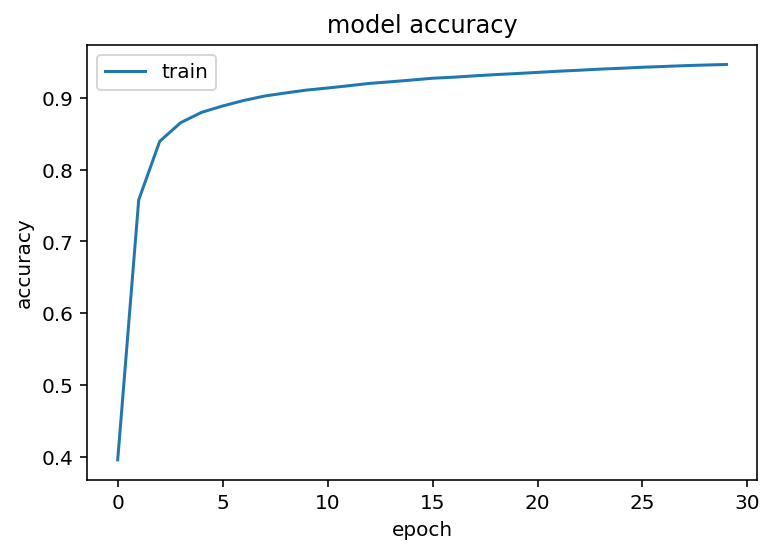

In [12]:
# summarize history for accuracy
#print(history.history.keys())
plt.plot(history.history['acc'])           #plot accuracy
plt.title('model accuracy')                #add a title for the plot
plt.ylabel('accuracy')                     #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()

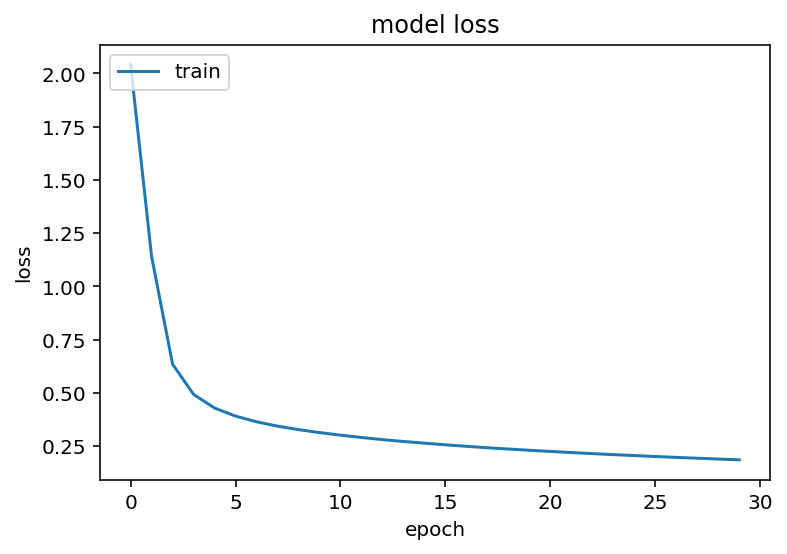

In [13]:
#lets plot loss now
plt.plot(history.history['loss'])          #plot loss
plt.title('model loss')                    #add a title for the plot
plt.ylabel('loss')                         #add a y axis label
plt.xlabel('epoch')                        #add x axis label
plt.legend(['train'], loc='upper left')    #add a legend and specify the position
plt.show()                                 #display plot

<h3>Step 9: Test a Case</h3>

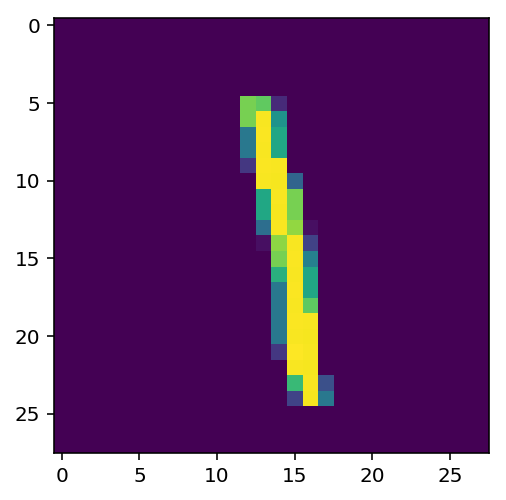

In [14]:
sample = test_x[31]                      #pull a case from test set
sample = sample.reshape((28,28))         #reshape it to 28x28 pixels
plt.imshow(sample)                       #display the image


In [15]:
sample = sample.reshape((1,784))                 #reshape the train set to 1x784
prediction = model.predict_classes(sample)       #based on the pixel values, predict the number
print("Class: ",prediction)                      #print the prediction

Class:  [1]


In [16]:
#display probabilty of each possible number
(model.predict(sample))

array([[3.5448204e-05, 9.6922821e-01, 7.2328065e-04, 9.6300440e-03,
        8.5203623e-04, 3.8801176e-03, 4.4347844e-04, 5.4652067e-03,
        2.4225216e-03, 7.3198341e-03]], dtype=float32)


 
<div style="text-align: center;"><img src="./coding hive logo med with text.png" height="60" width="47" />

<div>2019